In [9]:
import matplotlib.pyplot as plt

def get_rdf_values(pressure, pair):
    directory = 'D:/MSc/summer_project/p' + str(pressure)
    file_path = directory + '/rdf.out' + pair + '.txt'
    with open(file_path, 'r') as file:
        data = file.readlines()
        x_values = []
        y_values = []
        for line in data:
            x, y = map(float, line.split())
            x_values.append(x)
            y_values.append(y)
    return x_values, y_values
    
def plot_rdf(pair,pressure, x_values,y_values):
    label = 'P' + str(pressure)
    colour = 'red'
    plt.plot(x_values, y_values, label = label, color = colour)

    plt.legend()
    plt.xlim(-1,30)
    plt.ylim(-0.2,20)
    plt.xlabel('r [$a_0$]')
    plt.ylabel('g(r)')
    plt.grid(True)

    title_label = ''
    for character in pair[:-1]:
        if character == '1':
            title_label += 'O-'
        elif character == '2':
            title_label += 'C-'
        elif character == '3':
            title_label += 'Na-'
        else:
            print('Invalid character:', character)
            break
    title_label = title_label[:-1]
    plt.title('Radial Distribution Functions for ' + title_label)

######################

def find_max(lower_index, upper_index, x_values, y_values):
    plt.plot(x_values[lower_index],0, marker = '|', color = 'black', markersize = 100)
    plt.plot(x_values[upper_index],0, marker = '|', color = 'black', markersize = 100)
    max_index = None
    if upper_index - lower_index <= 50:
        print('x\ty')
        for index, values in enumerate(zip(x_values[lower_index:upper_index],y_values[lower_index:upper_index])):
            print(index+lower_index, '\t', values[0], '\t', values[1])
        highest_value = max(y_values[lower_index:upper_index])
        for index, values in enumerate(zip(x_values[lower_index:upper_index],y_values[lower_index:upper_index])):
            if values[1] == highest_value:
                print('The first maximum is at index ' + str(index+lower_index) + ' with x = ' + str(values[0]) + ' and y = ' + str(values[1])+'.')
                max_index = index + lower_index
                break
    return max_index


x	y
50 	 2.01999995484948 	 0.0
51 	 2.05999995395541 	 0.0
52 	 2.09999995306134 	 0.0
53 	 2.13999995216727 	 0.0
54 	 2.1799999512732 	 0.0
55 	 2.21999995037913 	 0.0
56 	 2.25999994948506 	 0.0
57 	 2.29999994859099 	 0.005664367519902146
58 	 2.33999994769692 	 0.0506194573124244
59 	 2.37999994680285 	 0.30483500987652
60 	 2.41999994590878 	 1.2612301559487
61 	 2.45999994501472 	 3.72044595548586
62 	 2.49999994412065 	 8.15936607611797
63 	 2.53999994322658 	 14.2465106496296
64 	 2.57999994233251 	 19.7548466691352
65 	 2.61999994143844 	 21.350334647944
66 	 2.65999994054437 	 17.7999544507114
67 	 2.6999999396503 	 11.2480703272329
68 	 2.73999993875623 	 5.33031771255552
69 	 2.77999993786216 	 1.80678665560263
70 	 2.81999993696809 	 0.450748712262954
71 	 2.85999993607402 	 0.07784627406830333
72 	 2.89999993517995 	 0.01202510668564553
73 	 2.93999993428588 	 0.0004333379205737428
74 	 2.97999993339181 	 0.0004217829366848027
75 	 3.01999993249774 	 0.0
76 	 3.05999993

65

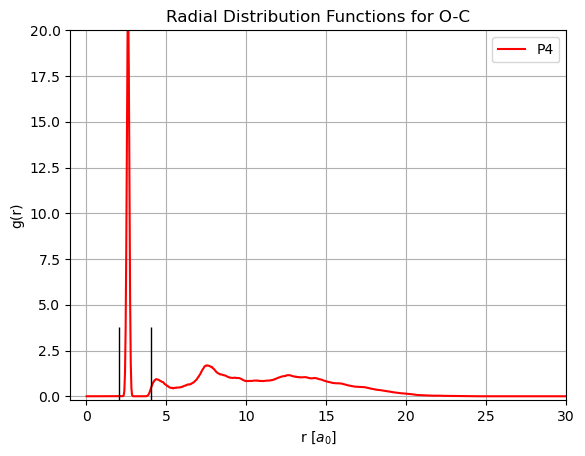

In [26]:
pressure = 4
pair = '121' #pairs = ['111','121', '131', '221', '231','331']

lower_index = 50
upper_index = 100

x_values, y_values = get_rdf_values(pressure, pair)
plot_rdf(pair,pressure,x_values,y_values)
find_max(lower_index, upper_index, x_values, y_values)

In [28]:
pressures_au = []

with open("d:/msc/summer_project/P_V_data.txt", "r") as file:
    # Read the first line (titles) and ignore it
    titles = file.readline()

    # Iterate through each remaining line in the file
    for line in file:
        # Split the line into columns using tab as the delimiter
        values_in_this_line = line.strip().split("\t")
        value_in_second_column = float(values_in_this_line[1])
        pressures_au.append(value_in_second_column)
print(pressures_au)

[-0.0006960107764065888, -0.0006988777245462026, -0.0005045056181645553, -3.774201379158113e-05, 0.0001912112647634661, 0.0011080624317742912]


In [11]:
import numpy as np

p1_separations = np.array([3.97999991104007,2.61999994143844, 4.45999990031123, 6.53999985381961, 5.77999987080693, 6.09999986365438])
p2_separations = np.array([3.97999991104007,2.61999994143844, 4.37999990209937, 6.13999986276031, 5.65999987348914, 5.89999986812472])
p3_separations = np.array([3.93999991193414,2.61999994143844, 4.29999990388751, 5.45999987795949, 5.45999987795949, 5.45999987795949])
p4_separations = np.array([3.89999991282821,2.61999994143844, 4.09999990835786, 5.17999988421798, 5.21999988332391, 5.29999988153577])
p5_separations = np.array([3.85999991372228,2.61999994143844, 4.05999990925193, 5.13999988511205, 5.21999988332391, 4.69999989494681])
p6_separations = np.array([3.81999991461635,2.57999994233251, 3.89999991282821,5.01999988779426, 5.01999988779426, 4.45999990031123])

all_p_separations = [p1_separations, p2_separations,p3_separations,p4_separations, p5_separations, p6_separations]
all_mean_separations = [np.mean(x) for x in all_p_separations]

In [17]:
separations_111 = [3.97999991104007, 3.97999991104007, 3.93999991193414, 3.89999991282821, 3.85999991372228, 3.81999991461635]
separations_121 = [2.61999994143844, 2.61999994143844, 2.61999994143844, 2.61999994143844, 2.61999994143844, 2.57999994233251]
separations_131 = [4.45999990031123, 4.37999990209937, 4.29999990388751, 4.09999990835786, 4.05999990925193, 3.89999991282821]
separations_221 = [6.53999985381961, 6.13999986276031, 5.45999987795949, 5.17999988421798, 5.13999988511205, 5.01999988779426]
separations_231 = [5.77999987080693, 5.65999987348914, 5.45999987795949, 5.21999988332391, 5.21999988332391, 5.01999988779426]
separations_331 = [6.09999986365438, 5.89999986812472, 5.45999987795949, 5.29999988153577, 4.69999989494681, 4.45999990031123]

Text(0, 0.5, 'Distance [$a_0$]')

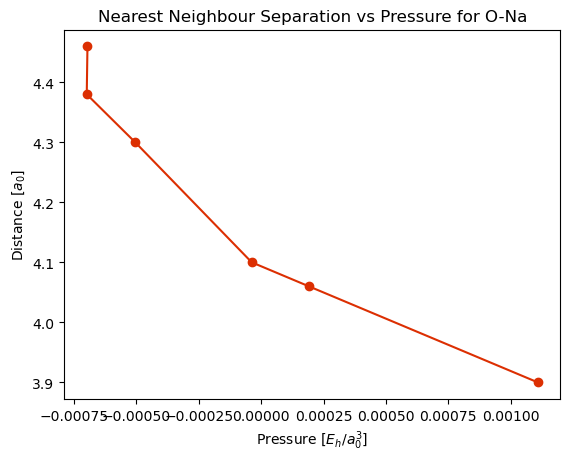

In [50]:
pair = '131'
separations = separations_131

title_label = ''
for character in pair[:-1]:
    if character == '1':
        title_label += 'O-'
    elif character == '2':
        title_label += 'C-'
    elif character == '3':
        title_label += 'Na-'
    else:
        print('Invalid character:', character)
        break
title_label = title_label[:-1]

plt.plot(pressures_au, separations, color = '#dc2f02', marker = 'o')
plt.title('Nearest Neighbour Separation vs Pressure for ' + title_label)
plt.xlabel('Pressure [$E_h$/$a_0^{3}$]')
plt.ylabel('Distance [$a_0$]')

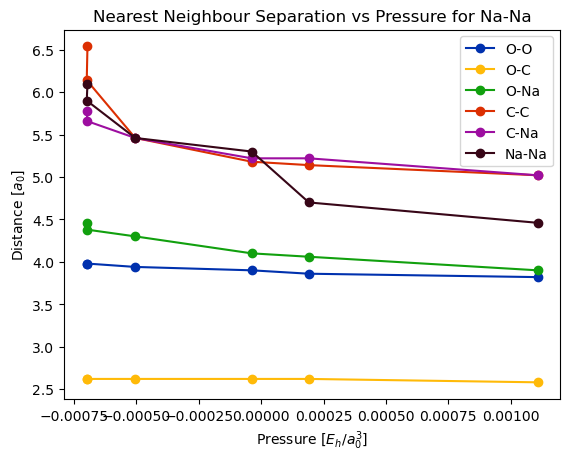

In [55]:
pairs = ['111','121', '131', '221', '231','331']
all_separations = [separations_111, separations_121, separations_131, separations_221, separations_231, separations_331]
colours = ['#0031ae', '#ffba08', '#11A00E','#dc2f02', '#9d0ea0','#370617']

for i in range(6):
    pair = pairs[i]
    separations = all_separations[i]
    title_label = ''
    for character in pair[:-1]:
        if character == '1':
            title_label += 'O-'
        elif character == '2':
            title_label += 'C-'
        elif character == '3':
            title_label += 'Na-'
        else:
            print('Invalid character:', character)
            break
    title_label = title_label[:-1]

    plt.plot(pressures_au, separations, color = colours[i], marker = 'o', label = title_label)
    plt.legend()
    plt.title('Nearest Neighbour Separation vs Pressure')
    plt.xlabel('Pressure [$E_h$/$a_0^{3}$]')
    plt.ylabel('Distance [$a_0$]')